In [1]:
import pandas as pd
import sqlite3
import sqlalchemy as db
from sqlalchemy.orm import Session
import matplotlib as plt
from collections import Counter
import operator

import matplotlib.pyplot as plt

In [2]:
engine = db.create_engine('sqlite:///flights.sqlite3', echo=True)     #relative directory (in same folder as this notebook so no directory)
connection = engine.connect()
flights = db.Table('ontime', db.MetaData(), autoload=True, autoload_with=engine)
session = Session(bind=engine)
cols = flights.columns

2019-11-25 23:24:40,509 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-11-25 23:24:40,510 INFO sqlalchemy.engine.base.Engine ()
2019-11-25 23:24:40,515 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-11-25 23:24:40,518 INFO sqlalchemy.engine.base.Engine ()
2019-11-25 23:24:40,525 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("ontime")
2019-11-25 23:24:40,534 INFO sqlalchemy.engine.base.Engine ()
2019-11-25 23:24:40,553 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'ontime' AND type = 'table'
2019-11-25 23:24:40,557 INFO sqlalchemy.engine.base.Engine ()
2019-11-25 23:24:40,567 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("ontime")
2019-11-25 23:24:40,568 INFO sqlalchemy.engine.base.Engine ()
2019-11-25 23:24:40,576 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SEL

In [3]:
def intervals(timeDelay):
    ranges = {
        "12:00AM-5:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) < 600).all(),
        "6:00AM-6:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 559, cols.CRSDepTime.cast(db.Integer) < 700).all(),
        "7:00AM-7:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 659, cols.CRSDepTime.cast(db.Integer) < 800).all(),
        "8:00AM-8:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 759, cols.CRSDepTime.cast(db.Integer) < 900).all(),
        "9:00AM-9:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 859, cols.CRSDepTime.cast(db.Integer) < 1000).all(),
        "10:00AM-10:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 959, cols.CRSDepTime.cast(db.Integer) < 1100).all(),
        "11:00AM-11:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1059, cols.CRSDepTime.cast(db.Integer) < 1200).all(),
        "12:00PM-12:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1159, cols.CRSDepTime.cast(db.Integer) < 1300).all(),
        "1:00PM-1:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1259, cols.CRSDepTime.cast(db.Integer) < 1400).all(),
        "2:00PM-2:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1359, cols.CRSDepTime.cast(db.Integer) < 1500).all(),
        "3:00PM-3:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1459, cols.CRSDepTime.cast(db.Integer) < 1600).all(),
        "4:00PM-4:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1559, cols.CRSDepTime.cast(db.Integer) < 1700).all(),
        "5:00PM-5:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1659, cols.CRSDepTime.cast(db.Integer) < 1800).all(),
        "6:00PM-6:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1759, cols.CRSDepTime.cast(db.Integer) < 1900).all(),
        "7:00PM-7:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1859, cols.CRSDepTime.cast(db.Integer) < 2000).all(),
        "8:00PM-8:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1959, cols.CRSDepTime.cast(db.Integer) < 2100).all(),
        "9:00PM-9:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 2059, cols.CRSDepTime.cast(db.Integer) < 2200).all(),
        "10:00PM-10:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 2159, cols.CRSDepTime.cast(db.Integer) < 2300).all(),
        "11:00PM-11:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 2259).all()
    }
    interval_totals = {}
    for key in ranges.keys():
        interval_totals[key] = len(ranges[key])
    return interval_totals

In [4]:
onehour = intervals(60)
threehours = intervals(180)
fivehours = intervals(300)

2019-11-25 23:24:40,739 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2019-11-25 23:24:40,741 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) < ?
2019-11-25 23:24:40,743 INFO sqlalchemy.engine.base.Engine (60, 600)
2019-11-25 23:25:14,502 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) > ? AND CAST(ontime."CRSDepTime" AS INTEGER) < ?
2019-11-25 23:25:14,502 INFO sqlalchemy.engine.base.Engine (60, 559, 700)
2019-11-25 23:26:01,885 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) > ? AND CAST(ontime."CRSDepTime" AS INTEGER) < ?
2019-11-25 23:26:01,885 INFO sqlalchemy.engine.ba

2019-11-25 23:37:50,339 INFO sqlalchemy.engine.base.Engine (180, 959, 1100)
2019-11-25 23:38:21,580 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) > ? AND CAST(ontime."CRSDepTime" AS INTEGER) < ?
2019-11-25 23:38:21,594 INFO sqlalchemy.engine.base.Engine (180, 1059, 1200)
2019-11-25 23:38:52,610 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) > ? AND CAST(ontime."CRSDepTime" AS INTEGER) < ?
2019-11-25 23:38:52,631 INFO sqlalchemy.engine.base.Engine (180, 1159, 1300)
2019-11-25 23:39:29,143 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) > ? AND CAST(ontime."CRSDepTime" AS INTEGE

2019-11-25 23:50:48,289 INFO sqlalchemy.engine.base.Engine (300, 1559, 1700)
2019-11-25 23:51:18,128 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) > ? AND CAST(ontime."CRSDepTime" AS INTEGER) < ?
2019-11-25 23:51:18,144 INFO sqlalchemy.engine.base.Engine (300, 1659, 1800)
2019-11-25 23:51:46,757 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) > ? AND CAST(ontime."CRSDepTime" AS INTEGER) < ?
2019-11-25 23:51:46,769 INFO sqlalchemy.engine.base.Engine (300, 1759, 1900)
2019-11-25 23:52:16,294 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) > ? AND CAST(ontime."CRSDepTime" AS INTEG

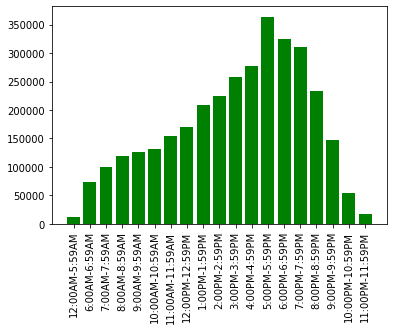

In [5]:
plt.bar(onehour.keys(), onehour.values(), width=0.8, color='g')
plt.xticks(range(len(onehour)), onehour.keys(), rotation=90)
plt.show()

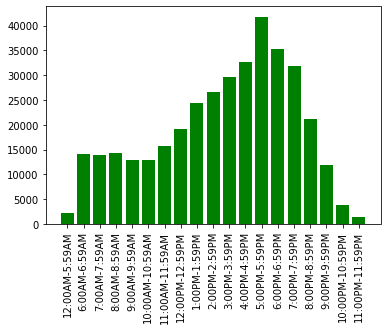

In [6]:
plt.bar(threehours.keys(), threehours.values(), width=0.8, color='g')
plt.xticks(range(len(threehours)), threehours.keys(), rotation=90)
plt.show()

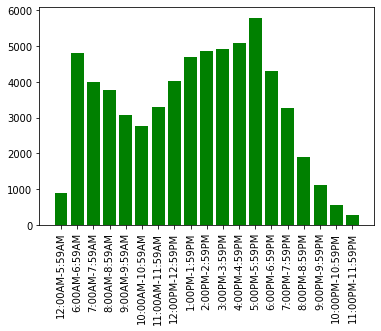

In [7]:
plt.bar(fivehours.keys(), fivehours.values(), width=0.8, color='g')
plt.xticks(range(len(fivehours)), fivehours.keys(), rotation=90)
plt.show()